In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
test = pd.read_csv('C:/Users/user/github/Data/aifactory/test_data.csv')
train = pd.read_csv('C:/Users/user/github/Data/aifactory/train_data.csv')


In [4]:
train = train.drop('out_pressure', axis=1)

In [5]:
test = test.drop('out_pressure',axis=1)

In [18]:
train_x_1 = train[(train['type']==0) | (train['type']==4)| (train['type']==5) | (train['type']==6) | (train['type']==7)]
train_x_2 = train[train['type'] == 1]
train_x_3 = train[train['type'] == 2]
train_x_4 = train[train['type'] == 3]

In [19]:
test_x_1 = test[(test['type']==0) | (test['type']==4)| (test['type']==5) | (test['type']==6) | (test['type']==7)]
test_x_2 = test[test['type'] == 1]
test_x_3 = test[test['type'] == 2]
test_x_4 = test[test['type'] == 3]

In [24]:
train_x_1 = train_x_1.drop('type', axis=1)
train_x_2 = train_x_2.drop('type', axis=1)
train_x_3 = train_x_3.drop('type', axis=1)
train_x_4 = train_x_4.drop('type', axis=1)

In [26]:
test_x_1 = test_x_1.drop('type', axis=1)
test_x_2 = test_x_2.drop('type', axis=1)
test_x_3 = test_x_3.drop('type', axis=1)
test_x_4 = test_x_4.drop('type', axis=1)

In [3]:
st = StandardScaler()

In [71]:
st.fit(train)

StandardScaler()

In [101]:
st_train = pd.DataFrame(st.fit_transform(train))

In [102]:
st_test = pd.DataFrame(st.fit_transform(test))

In [108]:
st_train_x_1 = st_train.loc[train_x_1.index]
st_train_x_2 = st_train.loc[train_x_2.index]
st_train_x_3 = st_train.loc[train_x_3.index]
st_train_x_4 = st_train.loc[train_x_4.index]

In [109]:
st_test_x_1 = st_test.loc[test_x_1.index]
st_test_x_2 = st_test.loc[test_x_2.index]
st_test_x_3 = st_test.loc[test_x_3.index]
st_test_x_4 = st_test.loc[test_x_4.index]

In [25]:
from sklearn.decomposition import PCA

In [110]:
from sklearn.mixture import GaussianMixture

# GMM: n_components = 모델의 총 수
gm_1 = GaussianMixture(n_components=4, covariance_type = 'full',n_init=30, random_state=42)
gm_1.fit(st_train)

GaussianMixture(n_components=4, n_init=30, random_state=42)

In [111]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=4, n_init=15, random_state=42)
bgm.fit(st_train)
np.round(bgm.weights_, 2)

array([0.29, 0.58, 0.12, 0.01])

In [112]:
print(gm_1.converged_)
print(bgm.converged_)

True
True


test = test.drop('label', axis=1)

In [113]:
gm_1.predict(test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
densities = gm_1.score_samples(st_test)
density_threshold = np.percentile(densities, 2)

In [122]:
bgm_densities = bgm.score_samples(st_test)
bgm_density_threshold = np.percentile(bgm_densities, 2)

In [123]:
print(density_threshold)
print(bgm_density_threshold)

-81203.85341515466
-1187.7036333168098


Text(0.5, 1.0, 'gmm result')

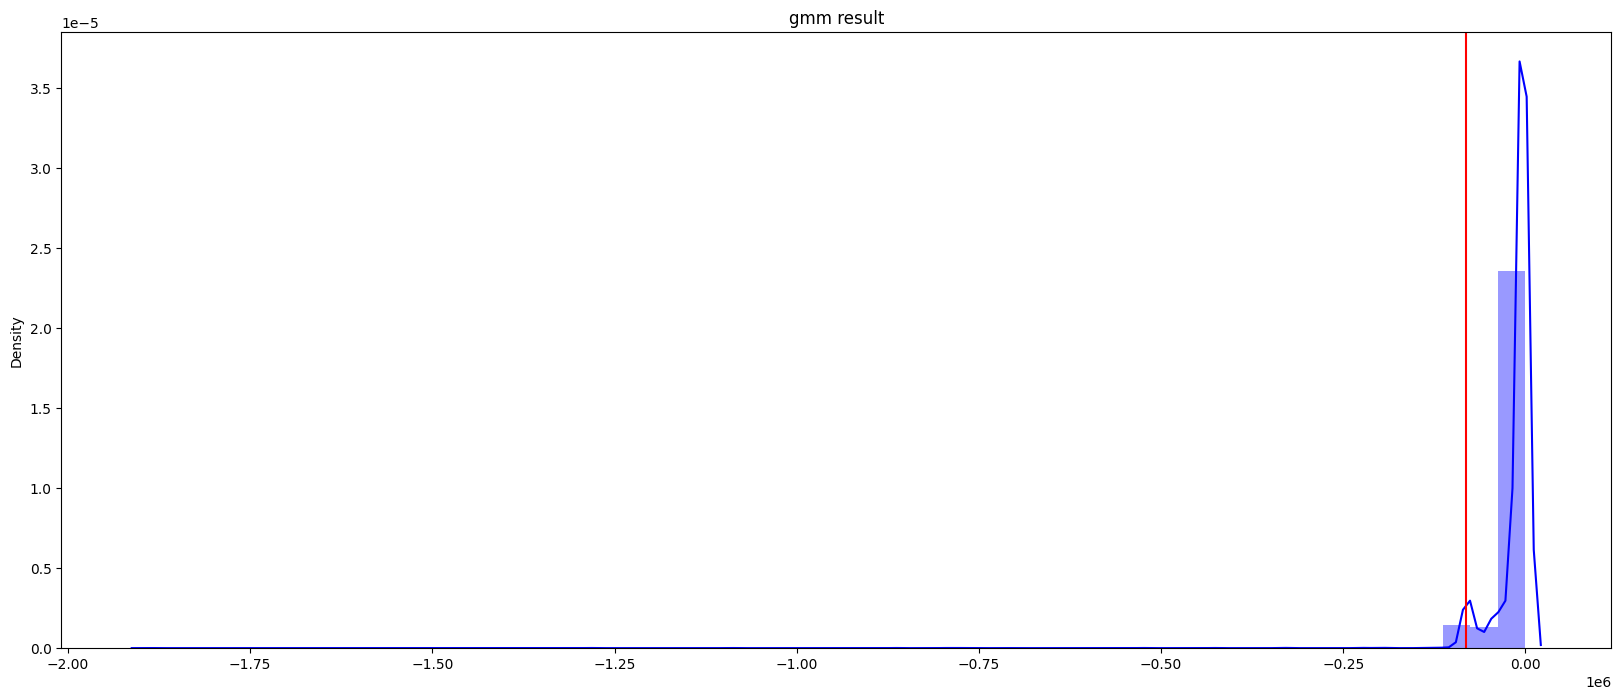

In [124]:
plt.figure(figsize=(20,8))
sns.distplot(densities, kde=True, color="b")
plt.axvline(density_threshold, color = 'red')
plt.title('gmm result')

Text(0.5, 1.0, 'bgm result')

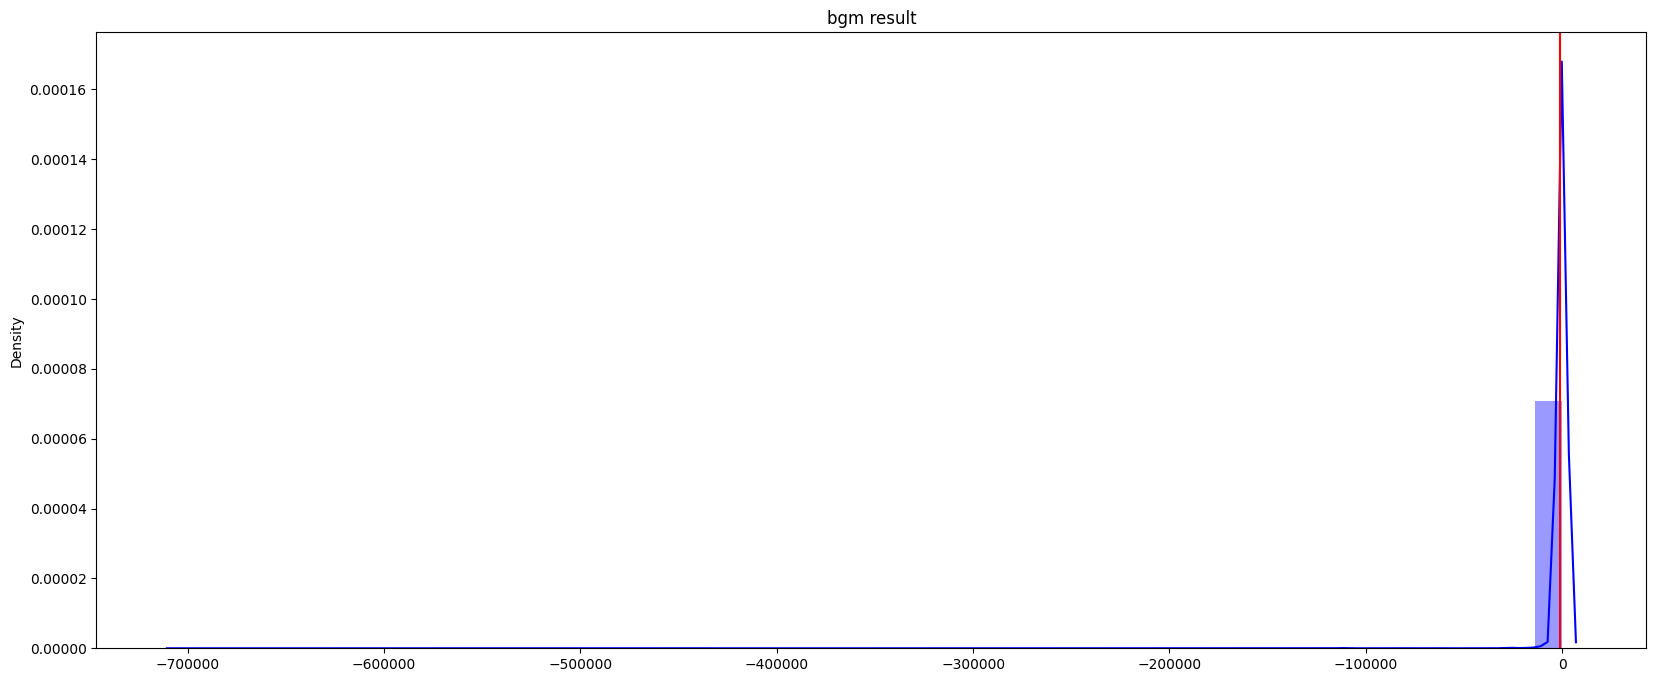

In [125]:
plt.figure(figsize=(20,8))
sns.distplot(bgm_densities, kde=True, color="b")
plt.axvline(bgm_density_threshold, color = 'red')
plt.title('bgm result')

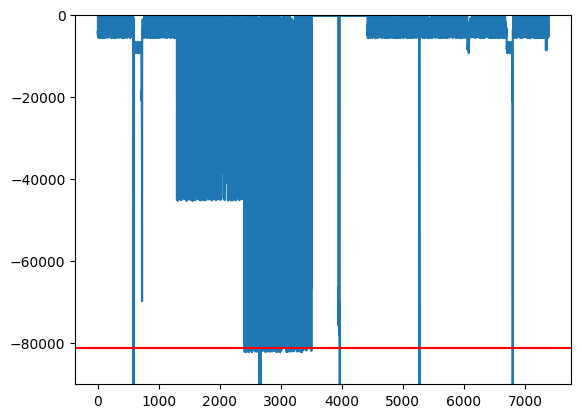

In [150]:
plt.plot(densities)
plt.axhline(density_threshold, color = 'r')
plt.ylim(-90000,10)
plt.show()

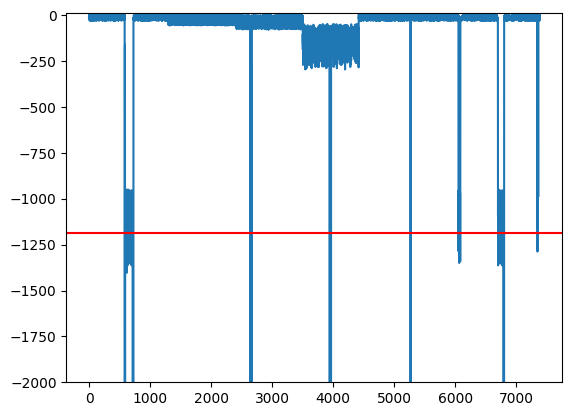

In [156]:
plt.plot(bgm_densities)
plt.axhline(bgm_density_threshold, color = 'r')
plt.ylim(-2000,15)
plt.show()

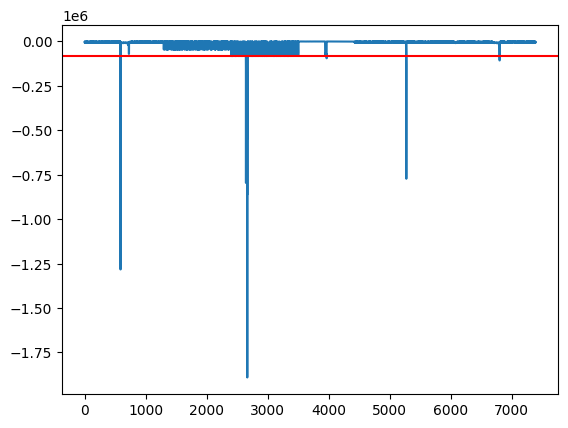

In [157]:
plt.plot(densities)
plt.axhline(density_threshold, color = 'r')

In [158]:
anomalies = test[densities < density_threshold]

In [162]:
bgm_anomalies = test[bgm_densities < bgm_density_threshold]

In [163]:
anomalies

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe
586,2.06,51.95,31.64,2476.0,59.34,3.58
588,2.86,63.93,43.88,3434.0,61.34,4.11
590,2.89,64.34,44.30,3467.0,63.34,4.13
591,1.21,39.08,18.48,1446.0,64.34,3.00
2406,0.34,32.33,5.45,1226.0,50.62,1.98
...,...,...,...,...,...,...
6796,0.88,40.88,16.58,1270.0,54.30,3.11
6797,1.57,53.23,29.48,2258.0,65.09,3.65
6798,1.83,57.98,34.44,2638.0,69.31,3.87
6799,1.99,60.84,37.43,2867.0,71.86,3.99


In [164]:
bgm_anomalies

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe
586,2.06,51.95,31.64,2476.0,59.34,3.58
587,1.35,41.20,20.65,1616.0,60.34,3.10
588,2.86,63.93,43.88,3434.0,61.34,4.11
590,2.89,64.34,44.30,3467.0,63.34,4.13
591,1.21,39.08,18.48,1446.0,64.34,3.00
...,...,...,...,...,...,...
6797,1.57,53.23,29.48,2258.0,65.09,3.65
6798,1.83,57.98,34.44,2638.0,69.31,3.87
6799,1.99,60.84,37.43,2867.0,71.86,3.99
6800,1.44,50.90,27.05,2072.0,63.02,3.55


In [165]:
result = pd.DataFrame(index = test.index ,columns=['gm','bgm','hotelling'], data=0)

In [166]:
result.loc[anomalies.index.tolist(), 'gm'] = 1

In [167]:
result.loc[bgm_anomalies.index.tolist(), 'bgm'] = 1

test.to_csv('C:/Users/user/Desktop/a.csv', index=False)

In [168]:
import numpy as np

def hotellings_tsquare(trdat, tedat):
    '''
    Hotellings T-square : 공분산을 반영한 유클리디안 거리 (마할라노비스 거리)
    
    @param trdat : train data
    @param tedat : test data
    '''
    obs = trdat.shape[0]
    dim = trdat.shape[1]
    
    mu = trdat.apply(np.mean, axis=0) # 열단위 평균계산
    sinv = np.linalg.pinv(trdat.cov()) # 공분산 역행렬

    dte = (tedat-mu).values 
    
    Tsq_mat = np.zeros(tedat.shape[0])
    for i in range(tedat.shape[0]):
        Tsq_mat[i] = dte[i,:] @ sinv @ dte[i,:].transpose() # t-square distance
        
    return Tsq_mat

def bootstrap_limit(stat, alpha=0.05, bootstrap=100):
    '''
    Bootstrap sampling을 활용한 Control Limit 산출 기법
    
    @param stat : 통계량
    @param alpha : Control Limit을 정하기 위한 유의수준
    @param : bootstrap : 샘플링 횟수
    '''
    alpha = (alpha/2)*100
    alpha = 100 - alpha
    samsize = max(10000, len(stat))
    limit = np.mean(list(map(lambda x:np.percentile(np.random.choice(stat,samsize,replace=True),alpha), range(0,bootstrap))))
    # stat에서 samsize만큼 선택 후 75%분위수(alpha에따라 변경) 뽑기 이후 bootstrap만큼 반복 후 리스트로 만들고 평균 계산
    return limit

In [185]:
hotellings_1 = hotellings_tsquare(pd.DataFrame(test_x_1), pd.DataFrame(train_x_1))
hotellings_2 = hotellings_tsquare(pd.DataFrame(train_x_2), pd.DataFrame(train_x_2))
hotellings_3 = hotellings_tsquare(pd.DataFrame(train_x_3), pd.DataFrame(train_x_3))
hotellings_4 = hotellings_tsquare(pd.DataFrame(train_x_4), pd.DataFrame(train_x_4))


In [186]:
hotellings_1_all = hotellings_tsquare(pd.DataFrame(train_x_1), pd.DataFrame(test_x_1))
hotellings_2_all = hotellings_tsquare(pd.DataFrame(train_x_2), pd.DataFrame(test_x_2))
hotellings_3_all = hotellings_tsquare(pd.DataFrame(train_x_3), pd.DataFrame(test_x_3))
hotellings_4_all = hotellings_tsquare(pd.DataFrame(train_x_4), pd.DataFrame(test_x_4))


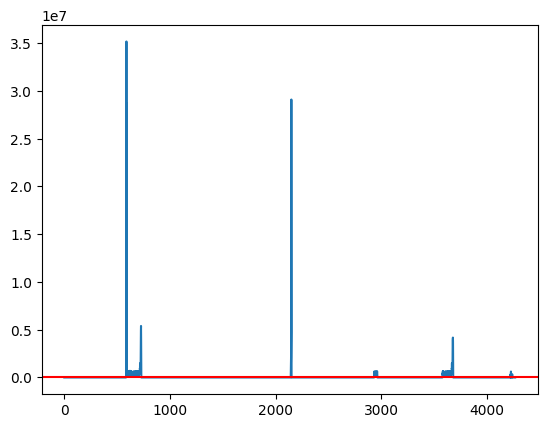

In [187]:
plt.plot(hotellings_1_all)
plt.axhline(y = bootstrap_limit(hotellings_1), color = 'r')


(0.0, 70.0)

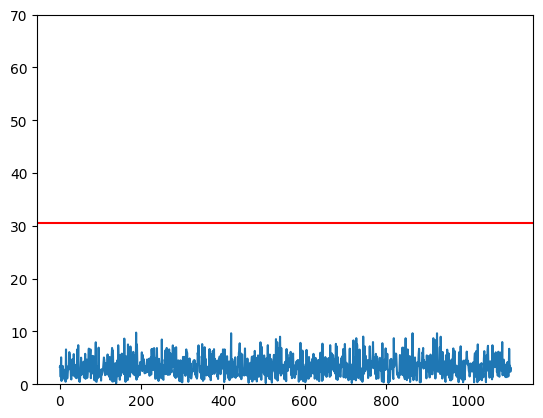

In [188]:
plt.plot(hotellings_2_all)
plt.axhline(y = bootstrap_limit(hotellings_2), color = 'r')
plt.ylim(0,70)

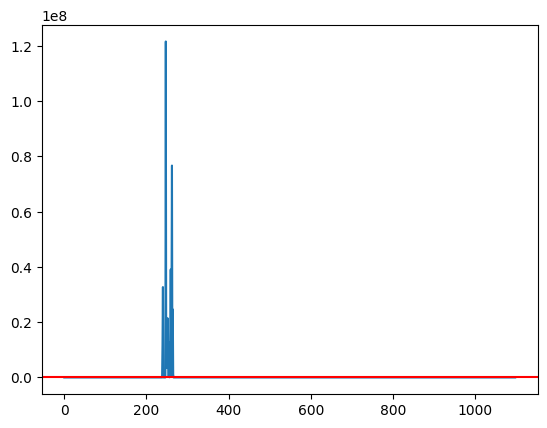

In [189]:
plt.plot(hotellings_3_all)
plt.axhline(y = bootstrap_limit(hotellings_3), color = 'r')


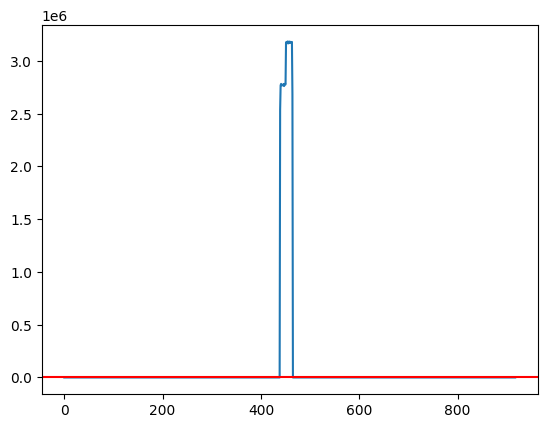

In [190]:
plt.plot(hotellings_4_all)
plt.axhline(y = bootstrap_limit(hotellings_4), color = 'r')


In [191]:
hotellings_1_anomalies = test_x_1[hotellings_1_all > bootstrap_limit(hotellings_1)]
hotellings_2_anomalies = test_x_2[hotellings_2_all > bootstrap_limit(hotellings_2)]
hotellings_3_anomalies = test_x_3[hotellings_3_all > bootstrap_limit(hotellings_3)]
hotellings_4_anomalies = test_x_4[hotellings_4_all > bootstrap_limit(hotellings_4)]

In [192]:
result.loc[hotellings_1_anomalies.index.tolist(), 'hotelling'] = 1
result.loc[hotellings_2_anomalies.index.tolist(), 'hotelling'] = 1
result.loc[hotellings_3_anomalies.index.tolist(), 'hotelling'] = 1
result.loc[hotellings_4_anomalies.index.tolist(), 'hotelling'] = 1

In [193]:
result['label'] = result.mean(axis=1)

In [194]:
for i in range(len(result)):
    if result.label[i] > 0.5:
        result.label[i] = 1
    else:
        result.label[i] = 0

<Axes: >

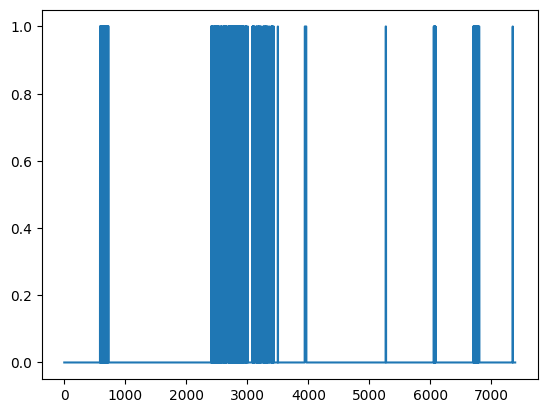

In [196]:
result.label.plot()

result.to_csv('C:/Users/user/Desktop/result.csv', index=False)